In [ ]:
import os
import json

KAGGLE_USERNAME = None
KAGGLE_KEY = None

if os.path.exists('kaggle.json'):
    with open('kaggle.json') as f:
        credentials = json.load(f)
        KAGGLE_USERNAME = credentials['username']
        KAGGLE_KEY = credentials['key']

%env KAGGLE_USERNAME = $KAGGLE_USERNAME
%env KAGGLE_KEY = $KAGGLE_KEY

In [10]:
!kaggle competitions download -c house-prices-advanced-regression-techniques

  0%|                                                | 0.00/199k [00:00<?, ?B/s]
100%|████████████████████████████████████████| 199k/199k [00:00<00:00, 2.24MB/s]


In [12]:
!mkdir data
!unzip house-prices-advanced-regression-techniques.zip -d data

mkdir: cannot create directory ‘data’: File exists
Archive:  house-prices-advanced-regression-techniques.zip
  inflating: data/data_description.txt  
  inflating: data/sample_submission.csv  
  inflating: data/test.csv           
  inflating: data/train.csv          


In [6]:
import pandas as pd

train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")
train.shape

(1460, 81)

In [7]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

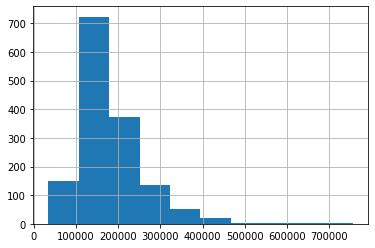

In [13]:
train.SalePrice.hist()

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


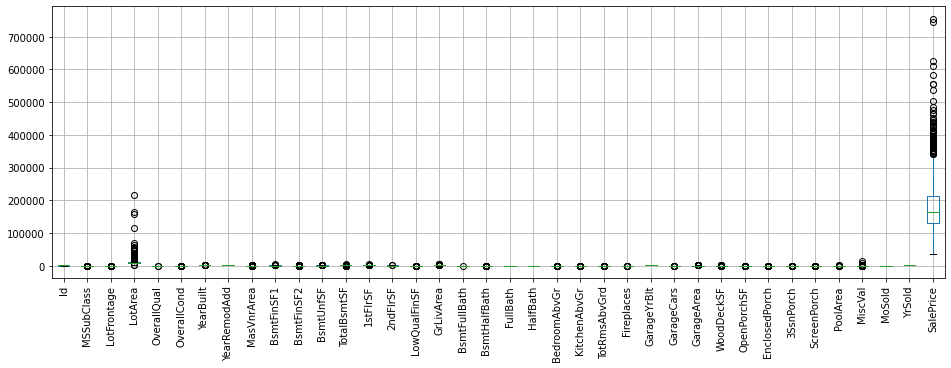

In [14]:
train.boxplot(figsize=(16,5), rot=90)

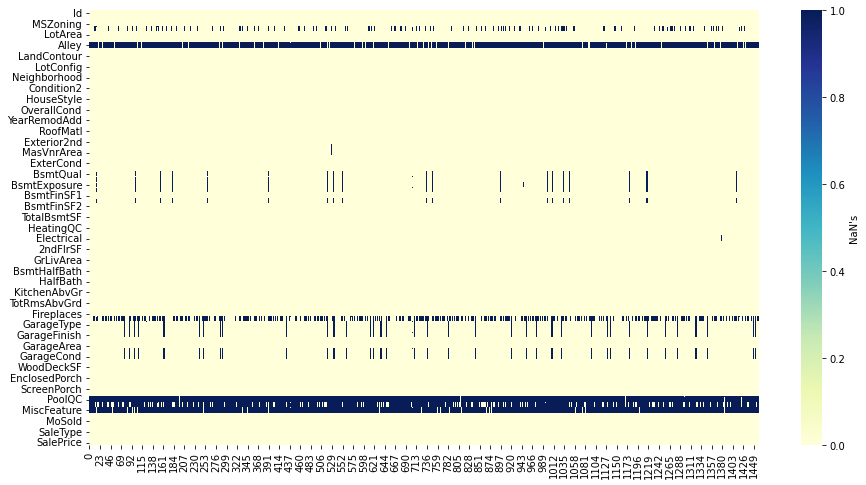

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize = (15,8))
sns.heatmap(train.isin([np.nan]).transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': "NaN's"})

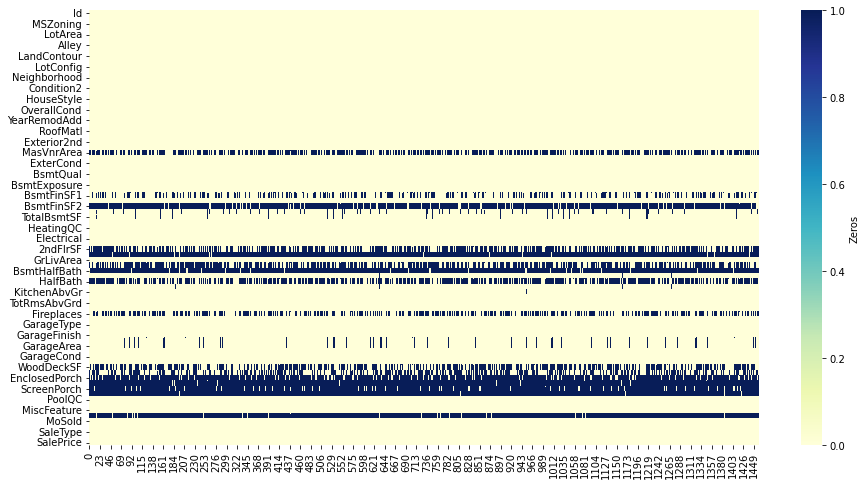

In [16]:
plt.figure(figsize = (15,8))
sns.heatmap(train.isin([0]).transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': "Zeros"})

In [17]:
#install java for H20 library
!apt-get install default-jre
!java -version

Reading package lists... Done
Building dependency tree       
Reading state information... Done
default-jre is already the newest version (2:1.11-68ubuntu1~18.04.1).
default-jre set to manually installed.
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
openjdk version "11.0.17" 2022-10-18
OpenJDK Runtime Environment (build 11.0.17+8-post-Ubuntu-1ubuntu218.04)
OpenJDK 64-Bit Server VM (build 11.0.17+8-post-Ubuntu-1ubuntu218.04, mixed mode, sharing)


In [18]:
!pip install h2o

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 177.5 MB 37 kB/s 
  Created wheel for h2o: filename=h2o-3.38.0.3-py2.py3-none-any.whl size=177541401 sha256=0b96f514020f5987c9d7328c76c315f41545ce8e9abfcf4c33cadc02a8952b5b
  Stored in directory: /root/.cache/pip/wheels/16/f8/f4/69e1ff6a0d1cb61bdbc0d9888ee8437a1acf1eb1c6ffb8be20
Successfully built h2o


In [19]:
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.17" 2022-10-18; OpenJDK Runtime Environment (build 11.0.17+8-post-Ubuntu-1ubuntu218.04); OpenJDK 64-Bit Server VM (build 11.0.17+8-post-Ubuntu-1ubuntu218.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.8/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpsq419l7n
  JVM stdout: /tmp/tmpsq419l7n/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpsq419l7n/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.38.0.3
H2O_cluster_version_age:,22 days
H2O_cluster_name:,H2O_from_python_unknownUser_ogv8e2
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.172 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [22]:
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
houses = h2o.import_file("data/train.csv")
houses

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1,60,RL,65,8450,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NA,Attchd,2003,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NA,NA,NA,0,2,2008,WD,Normal,208500
2,20,RL,80,9600,Pave,NA,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NA,NA,NA,0,5,2007,WD,Normal,181500
3,60,RL,68,11250,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NA,NA,NA,0,9,2008,WD,Normal,223500
4,70,RL,60,9550,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000
5,60,RL,84,14260,Pave,NA,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NA,NA,NA,0,12,2008,WD,Normal,250000
6,50,RL,85,14115,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NA,Attchd,1993,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NA,MnPrv,Shed,700,10,2009,WD,Normal,143000
7,20,RL,75,10084,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NA,NA,NA,0,8,2007,WD,Normal,307000
8,60,RL,nan,10382,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NA,NA,Shed,350,11,2009,WD,Normal,200000
9,50,RM,51,6120,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NA,NA,NA,0,4,2008,WD,Abnorml,129900
10,190,RL,50,7420,Pave,NA,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,GasA,Ex,Y,SBrkr,1077,0,0,1077,1,0,1,0,2,2,TA,5,Typ,2,TA,Attchd,1939,RFn,1,205,Gd,TA,Y,0,4,0,0,0,0,NA,NA,NA,0,1,2008,

In [23]:
houses.types

{'Id': 'int',
 'MSSubClass': 'int',
 'MSZoning': 'enum',
 'LotFrontage': 'int',
 'LotArea': 'int',
 'Street': 'enum',
 'Alley': 'enum',
 'LotShape': 'enum',
 'LandContour': 'enum',
 'Utilities': 'enum',
 'LotConfig': 'enum',
 'LandSlope': 'enum',
 'Neighborhood': 'enum',
 'Condition1': 'enum',
 'Condition2': 'enum',
 'BldgType': 'enum',
 'HouseStyle': 'enum',
 'OverallQual': 'int',
 'OverallCond': 'int',
 'YearBuilt': 'int',
 'YearRemodAdd': 'int',
 'RoofStyle': 'enum',
 'RoofMatl': 'enum',
 'Exterior1st': 'enum',
 'Exterior2nd': 'enum',
 'MasVnrType': 'enum',
 'MasVnrArea': 'int',
 'ExterQual': 'enum',
 'ExterCond': 'enum',
 'Foundation': 'enum',
 'BsmtQual': 'enum',
 'BsmtCond': 'enum',
 'BsmtExposure': 'enum',
 'BsmtFinType1': 'enum',
 'BsmtFinSF1': 'int',
 'BsmtFinType2': 'enum',
 'BsmtFinSF2': 'int',
 'BsmtUnfSF': 'int',
 'TotalBsmtSF': 'int',
 'Heating': 'enum',
 'HeatingQC': 'enum',
 'CentralAir': 'enum',
 'Electrical': 'enum',
 '1stFlrSF': 'int',
 '2ndFlrSF': 'int',
 'LowQualFi

In [35]:
for col in train.columns:
  if len(train[col].unique()) < 20 and (train[col].dtype == 'int64' or train[col].dtype == 'float64'):
    print(f"{col}: {train[col].unique()}")

MSSubClass: [ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]
OverallQual: [ 7  6  8  5  9  4 10  3  1  2]
OverallCond: [5 8 6 7 4 2 3 9 1]
BsmtFullBath: [1 0 2 3]
BsmtHalfBath: [0 1 2]
FullBath: [2 1 3 0]
HalfBath: [1 0 2]
BedroomAbvGr: [3 4 1 2 0 5 6 8]
KitchenAbvGr: [1 2 3 0]
TotRmsAbvGrd: [ 8  6  7  9  5 11  4 10 12  3  2 14]
Fireplaces: [0 1 2 3]
GarageCars: [2 3 1 0 4]
PoolArea: [  0 512 648 576 555 480 519 738]
MoSold: [ 2  5  9 12 10  8 11  4  1  7  3  6]
YrSold: [2008 2007 2006 2009 2010]


In [37]:
factors = ['OverallQual', 'OverallCond', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageCars', 'MoSold', 'YrSold']
for col in factors:
  houses[col] = houses[col].asfactor()

In [42]:
houses.types["OverallQual"]

'enum'

In [43]:
predictors = houses.columns[:-1]
response = "SalePrice"

H2Otrain, H2Ovalid = houses.split_frame(ratios = [0.8], seed = 1234)

houses_glm = H2OGeneralizedLinearEstimator(alpha = 0.25)
houses_glm.train(x = predictors, y = response, training_frame = H2Otrain, validation_frame= H2Ovalid)

glm Model Build progress: |

/usr/local/lib/python3.8/dist-packages/h2o/estimators/estimator_base.py:193: RuntimeWarning: Dropping bad and constant columns: [Utilities]
  warnings.warn(mesg["message"], RuntimeWarning)


██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1671175443907_1


GLM Model: summary
    family    link      regularization                                 number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  ---------------------------------------------  ----------------------------  -----------------------------  ----------------------  ----------------
    gaussian  identity  Elastic Net (alpha = 0.25, lambda = 22346.0 )  362                           81                             2                       py_14_sid_8ead

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 6391195780.937073
RMSE: 79944.95469344562
MAE: 58000.37507735801
RMSLE: 0.4097687434304381
Mean Residual Deviance: 6391195780.937073
R^2: 0.00045731543031657385
Null degrees of freedom: 1178
Residual degrees of freedom: 1097
Null deviance: 7538667374639.248
Residual deviance: 7535219825724.809
AIC: 30131.539794850454

ModelMetricsRegressionGLM: glm
** Reported on validation data. **

MSE: 5937580074.582238
RMSE: 77055.69462786146
MAE: 54973.02240363551
RMSLE: 0.39778227300502494
Mean Residual Deviance: 5937580074.582238
R^2: 0.0004694923749158919
Null degrees of freedom: 280
Residual degrees of freedom: 199
Null deviance: 1669244022373.4531
Residual deviance: 1668460000957.609
AIC: 7287.226921042753

Scoring History: 
    timestamp            duration    iterations    negative_log_likelihood    objective          training_rmse      training_deviance    training_mae       training_r2             validation_rmse    validation_deviance    validation_mae     validation_r2
--  -------------------  ----------  ------------  -------------------------  -----------------  -----------------  -------------------  -----------------  ----------------------  -----------------  ---------------------  -----------------  ---------------------
    2022-12-16 08:09:38  0.000 sec   0             7538667374639.248          6394119910.635494
    2022-12-16 08:09:38  0.206 sec   2                                                           79944.95469344562  6391195780.937073    58000.37507735801  0.00045731543031657385  77055.69462786146  5937580074.582238      54973.02240363551  0.0004694923749158919

Variable Importances: 
variable       relative_importance    scaled_importance    percentage
-------------  ---------------------  -------------------  --------------------
GrLivArea      2.9990293979644775     1.0                  0.05983446516064503
GarageArea     2.624312162399292      0.8750538304761146   0.05235837793331206
TotalBsmtSF    2.5620596408843994     0.854296274195691    0.051116360655230925
1stFlrSF       2.547771453857422      0.8495320037831784   0.05083129308321755
YearBuilt      2.142476797103882      0.7143900618506904   0.04274514726691618
TotRmsAbvGrd   2.111534833908081      0.7040727361129694   0.04212781559951149
YearRemodAdd   2.0888617038726807     0.6965125801335751   0.04167545770995338
MasVnrArea     1.9096498489379883     0.6367559618568992   0.03809995241555965
GarageYrBlt    1.8302593231201172     0.6102838886348909   0.03651601007262735
BsmtFinSF1     1.6476174592971802     0.5493835640342382   0.03287207172203762
---            ---                    ---                  ---
LandSlope.Sev  0.0                    0.0                  0.0
Street.Grvl    0.0                    0.0                  0.0
Street.Pave    0.0                    0.0                  0.0
CentralAir.N   0.0                    0.0                  0.0
CentralAir.Y   0.0                    0.0                  0.0
Id             0.0                    0.0                  0.0
BsmtFinSF2     0.0                    0.0                  0.0
LowQualFinSF   0.0                    0.0                  0.0
3SsnPorch      0.0                    0.0                  0.0
MiscVal        0.0                    0.0                  0.0
[

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

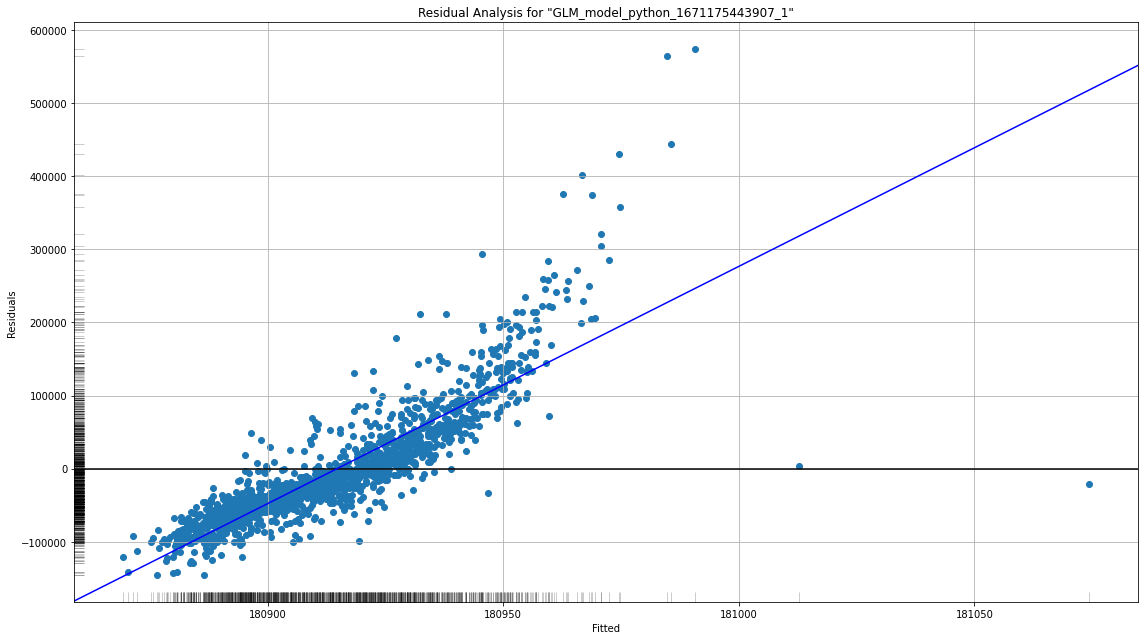

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

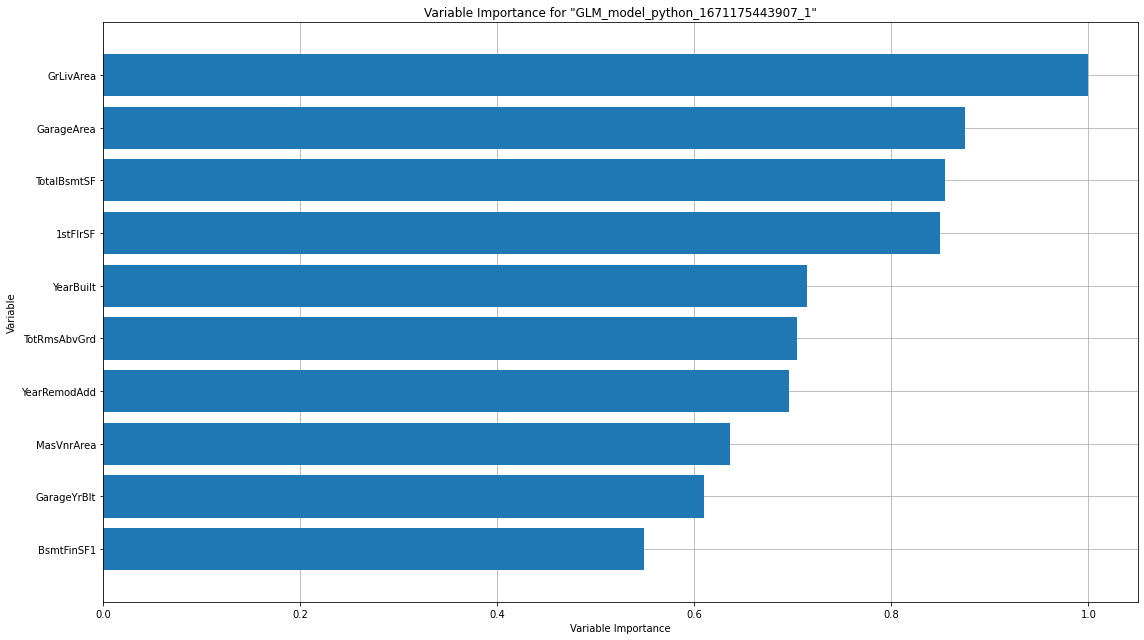

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

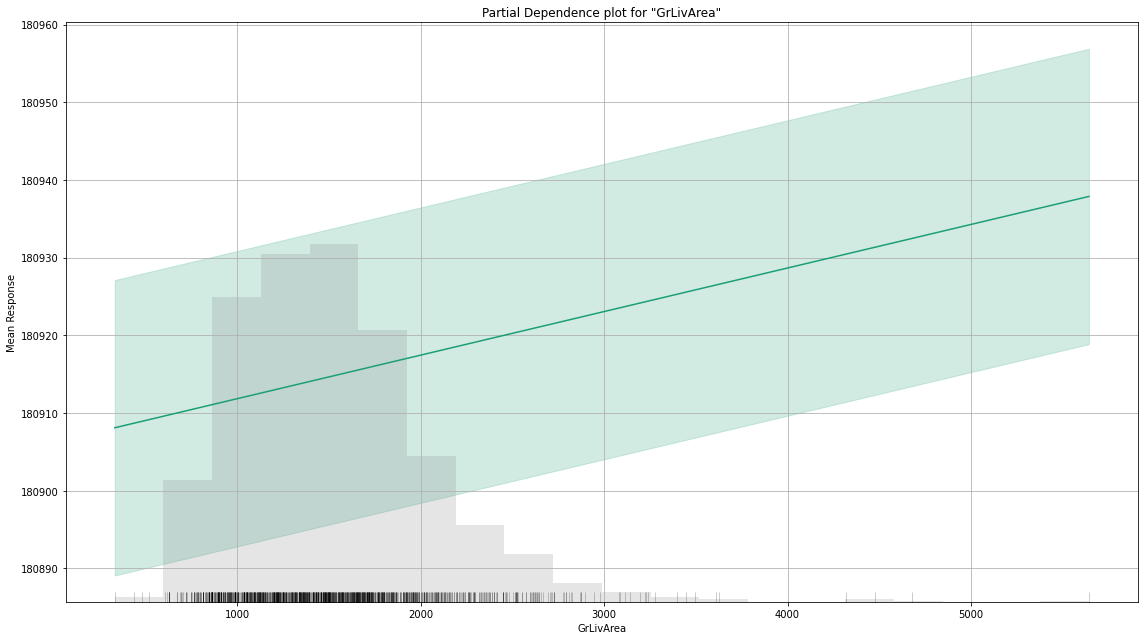

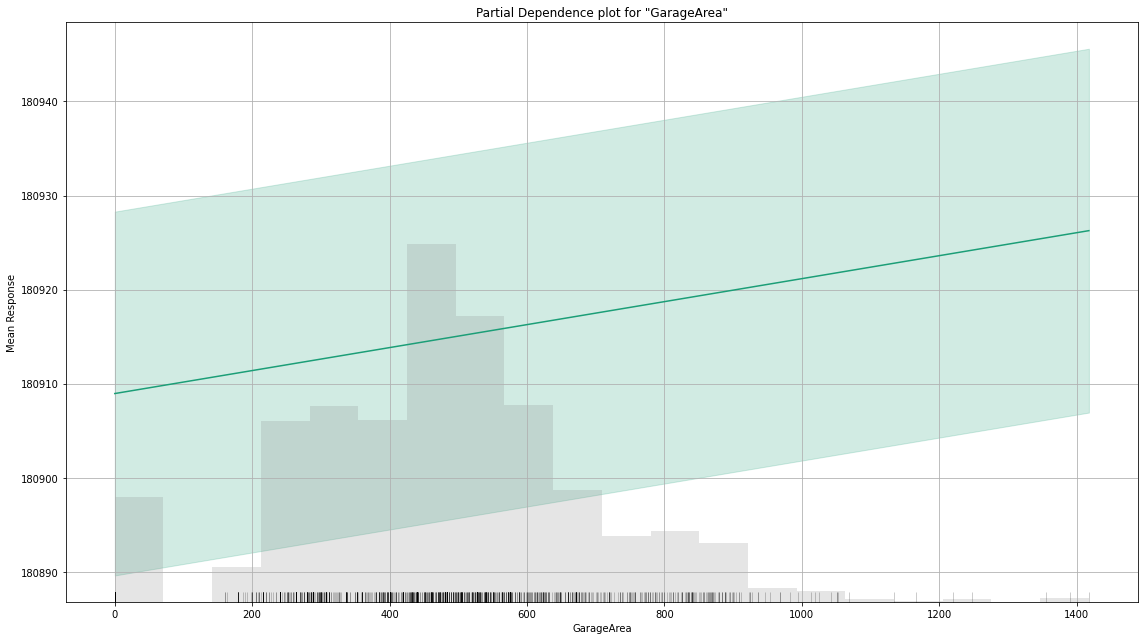

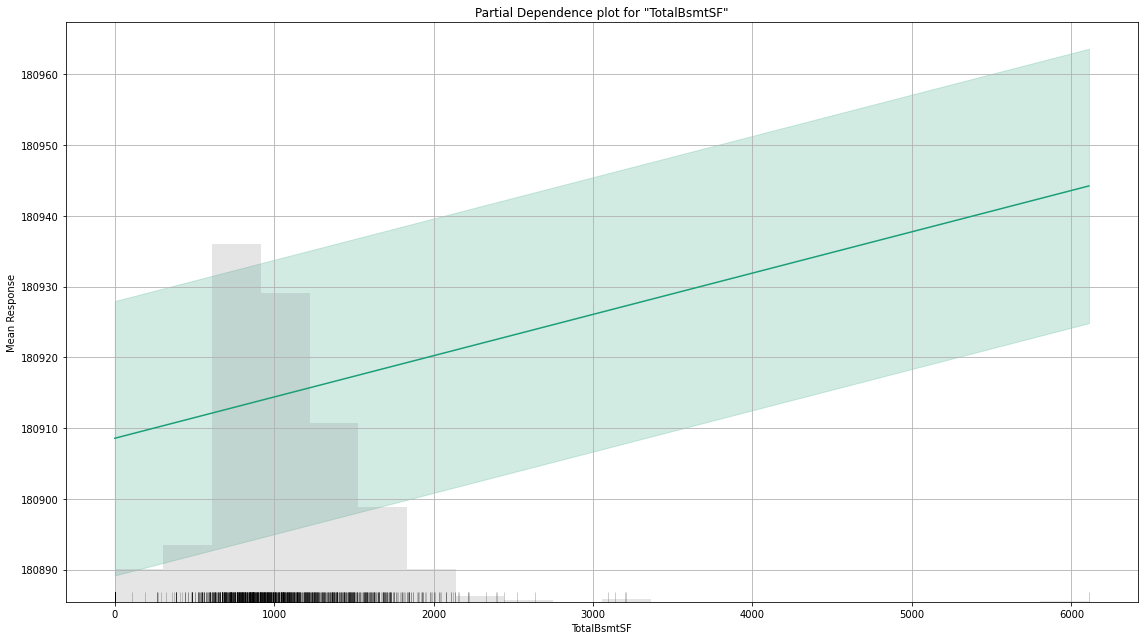

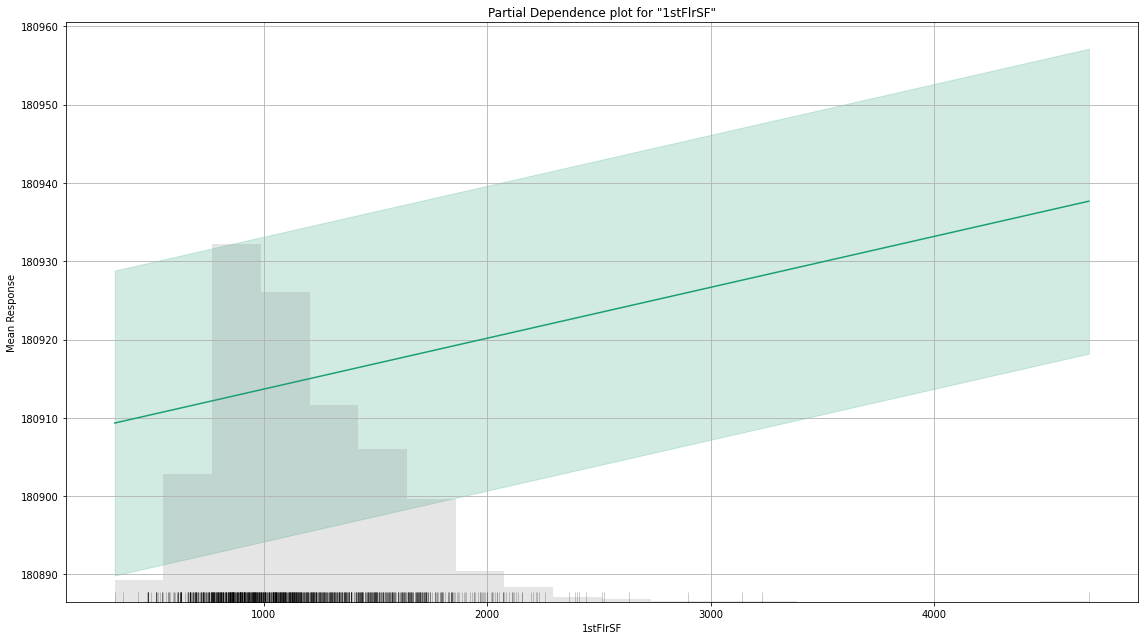

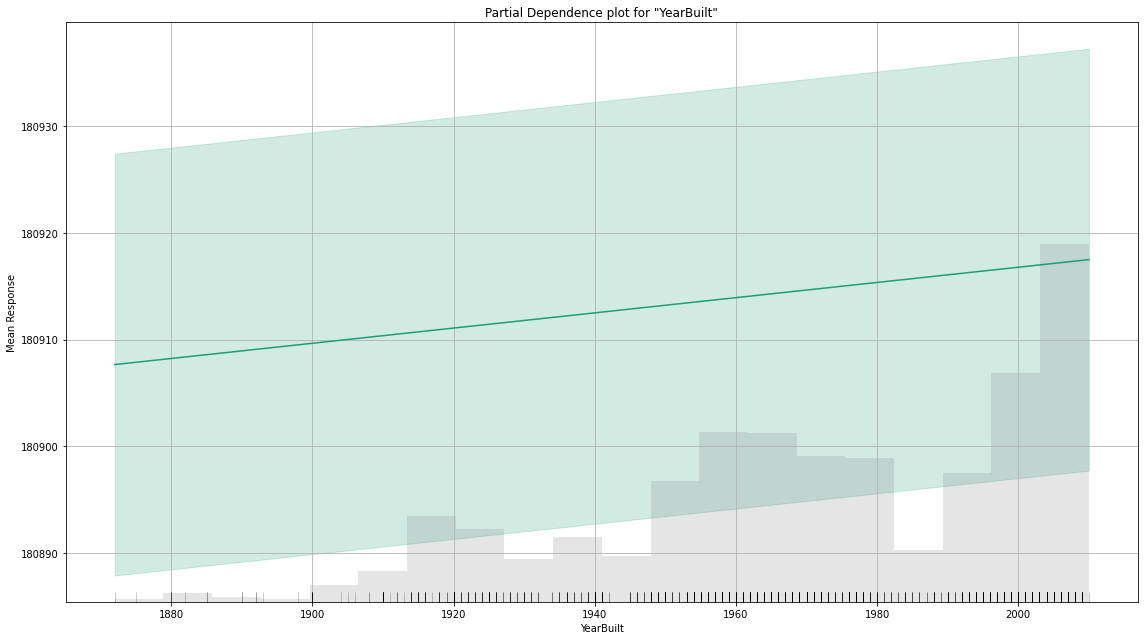

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

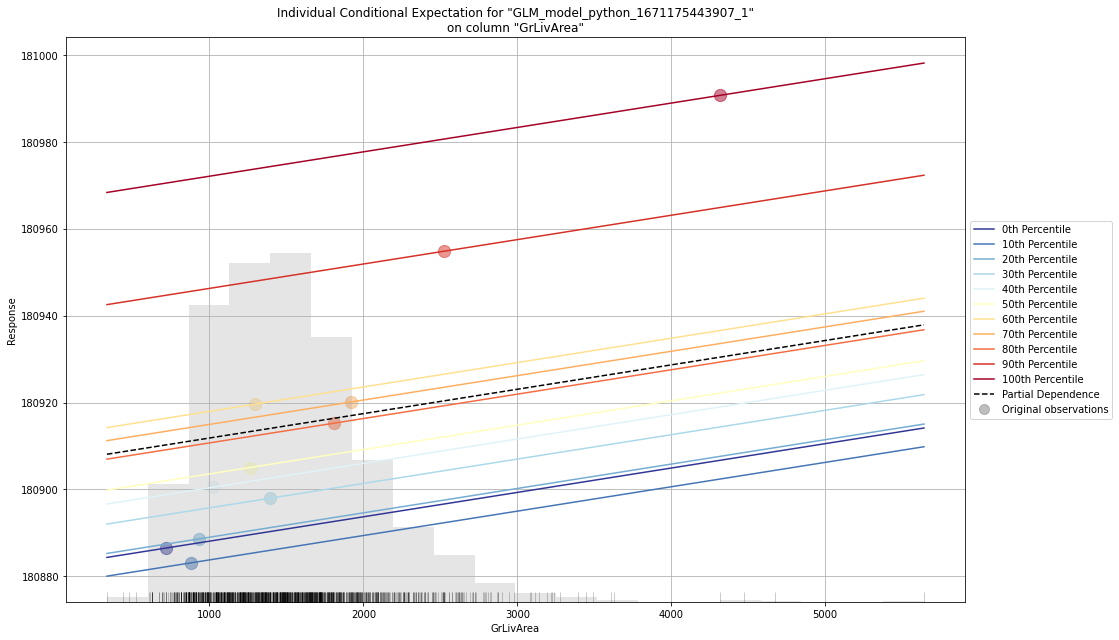

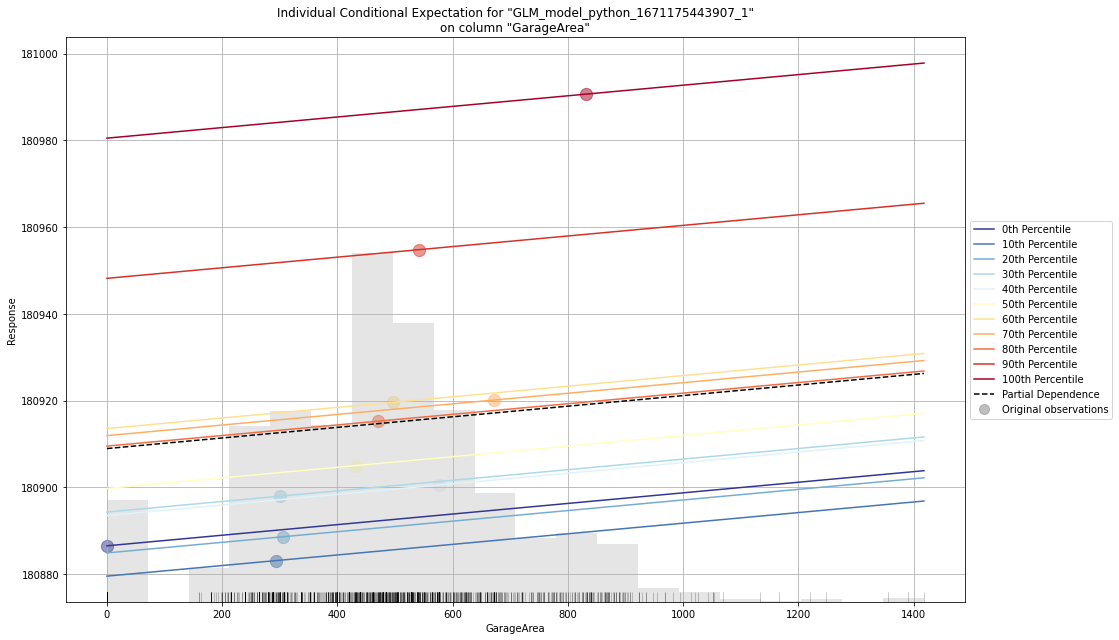

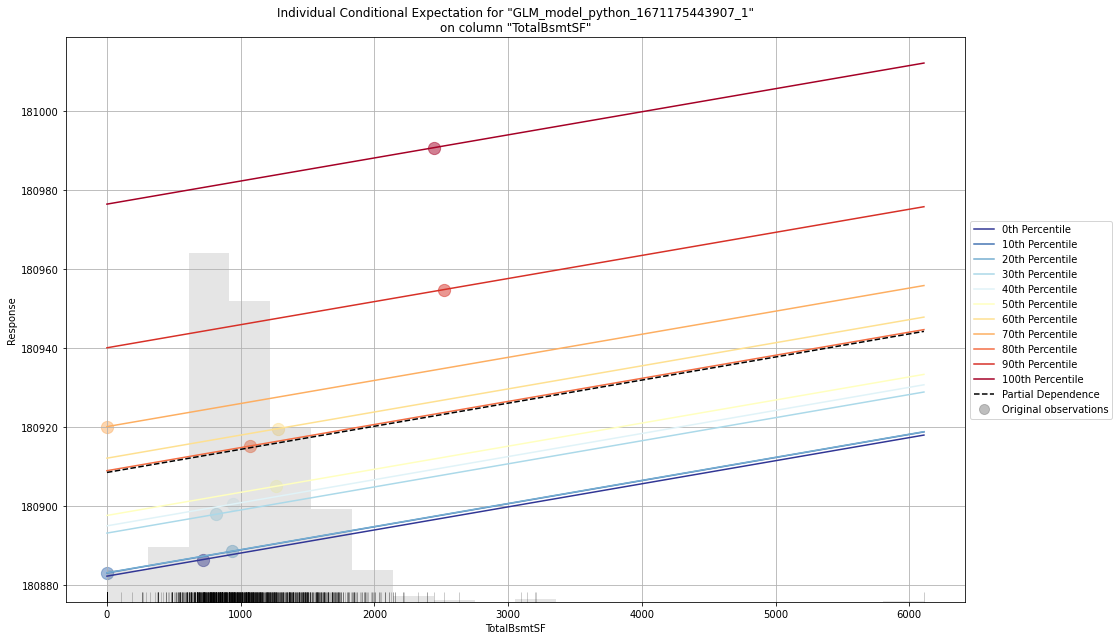

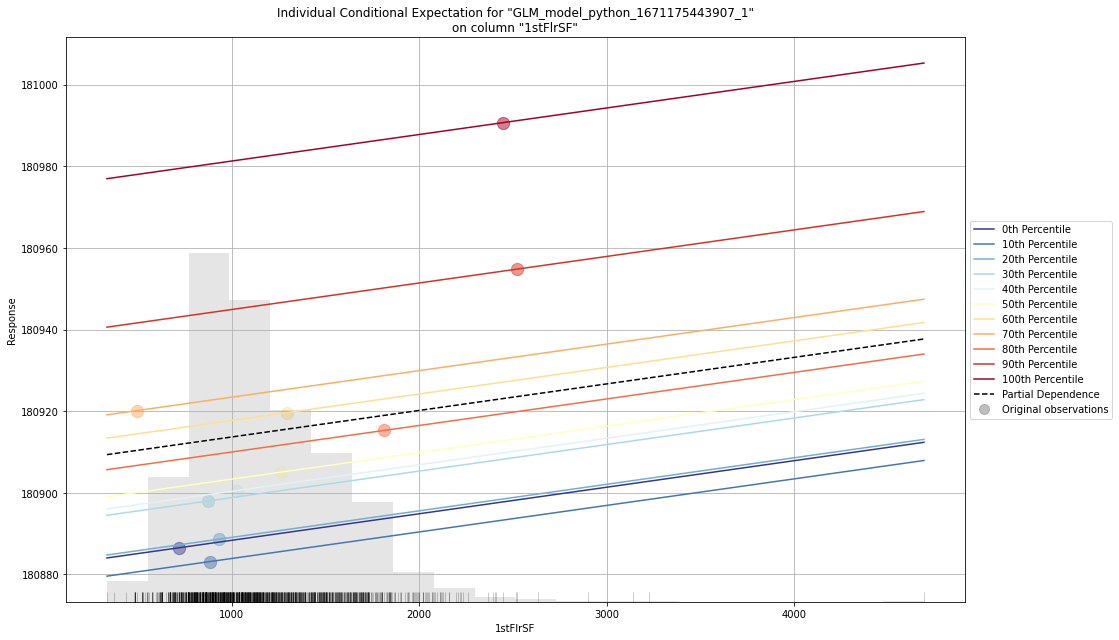

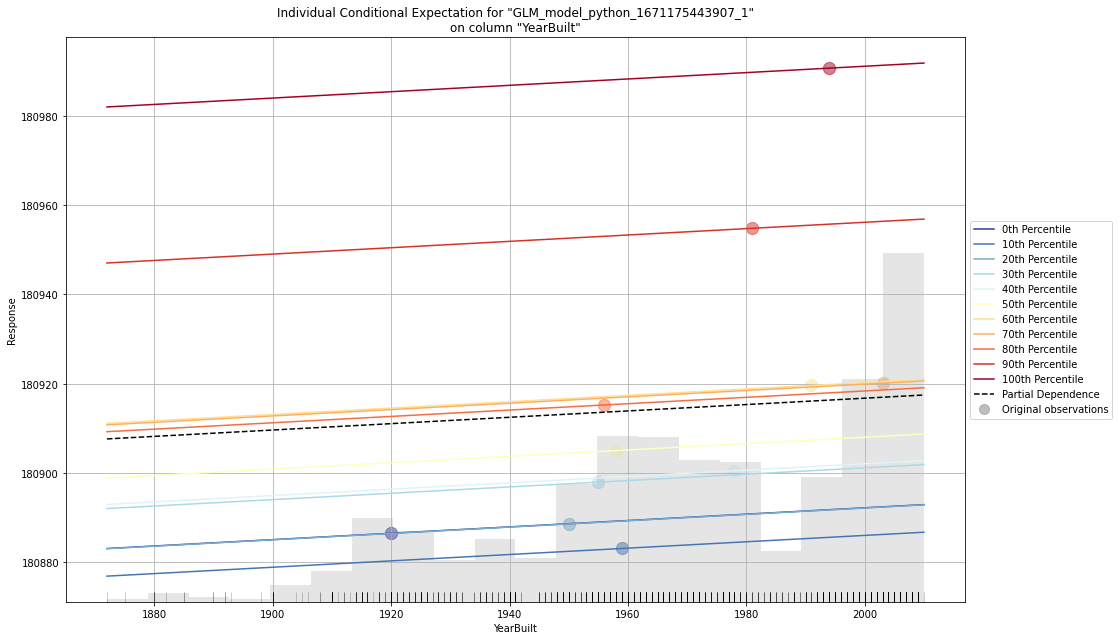

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

In [45]:
houses_glm.explain(houses)

In [46]:
from h2o.estimators import H2ORandomForestEstimator

houses_drf =  H2ORandomForestEstimator()
houses_drf.train(x = predictors, y = response, training_frame = H2Otrain, validation_frame= H2Ovalid)

drf Model Build progress: |

/usr/local/lib/python3.8/dist-packages/h2o/estimators/estimator_base.py:193: RuntimeWarning: Dropping bad and constant columns: [Utilities]
  warnings.warn(mesg["message"], RuntimeWarning)


██████████████████████████████████████████████████████| (done) 100%


,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
,50.0,50.0,452438.0,17.0,20.0,19.6,679.0,743.0,715.7
,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance,validation_rmse,validation_mae,validation_deviance
,2022-12-16 08:22:40,0.043 sec,0.0,nan,nan,nan,nan,nan,nan
,2022-12-16 08:22:41,0.840 sec,1.0,50748.6151929,31926.2840909,2575421943.9977274,48981.2385884,31226.7330961,2399161733.6583629
,2022-12-16 08:22:41,1.119 sec,2.0,46327.4092838,29770.0848921,2146228850.9489210,39508.0484306,25003.6779359,1560885890.7909253
,2022-12-16 08:22:41,1.399 sec,3.0,43358.9935950,28128.4895833,1880002325.5700872,35490.8261948,22365.7212337,1259598743.9901147
,2022-12-16 08:22:41,1.617 sec,4.0,41750.6325452,26828.5747775,1743115317.9271476,33476.8359013,21247.1903915,1120698541.9630783
,2022-12-16 08:22:42,1.853 sec,5.0,40033.4541593,26279.7535646,1602677451.9259944,32074.3581406,20658.1202847,1028764450.1328114
,2022-12-16 08:22:42,2.205 sec,6.0,39382.7937849,25635.7784608,1551004446.3078873,31909.9657131,20597.0510083,1018245911.8094109
,2022-12-16 08:22:42,2.480 sec,7.0,37922.3222381,24559.6572954,1438102523.9288671,30568.7750065,19808.7580071,934450005.3984312


# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

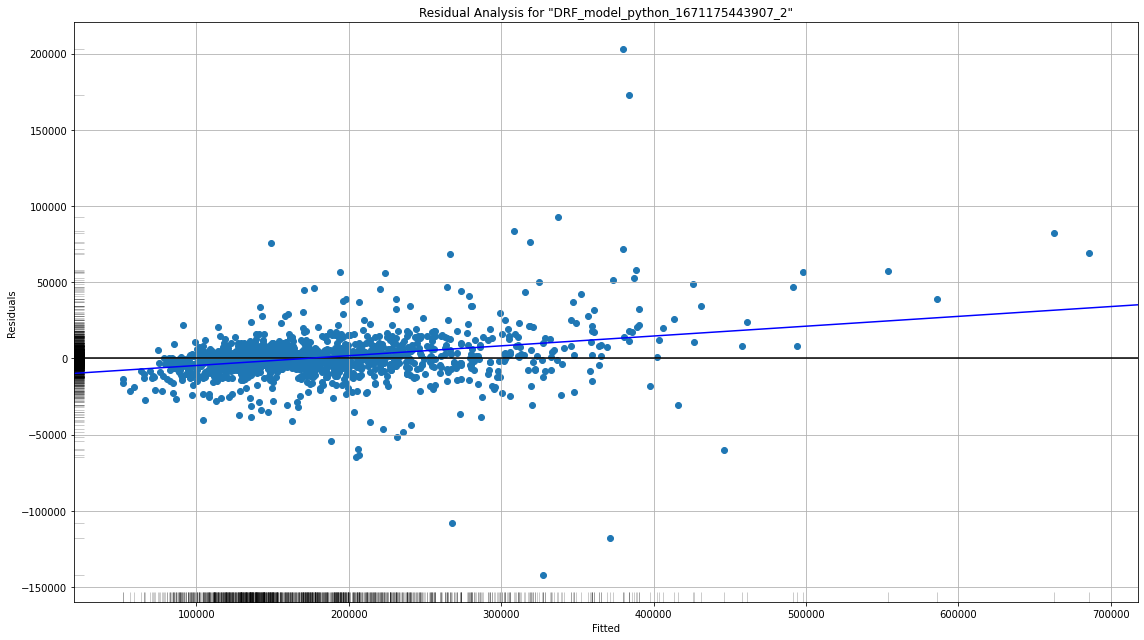

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

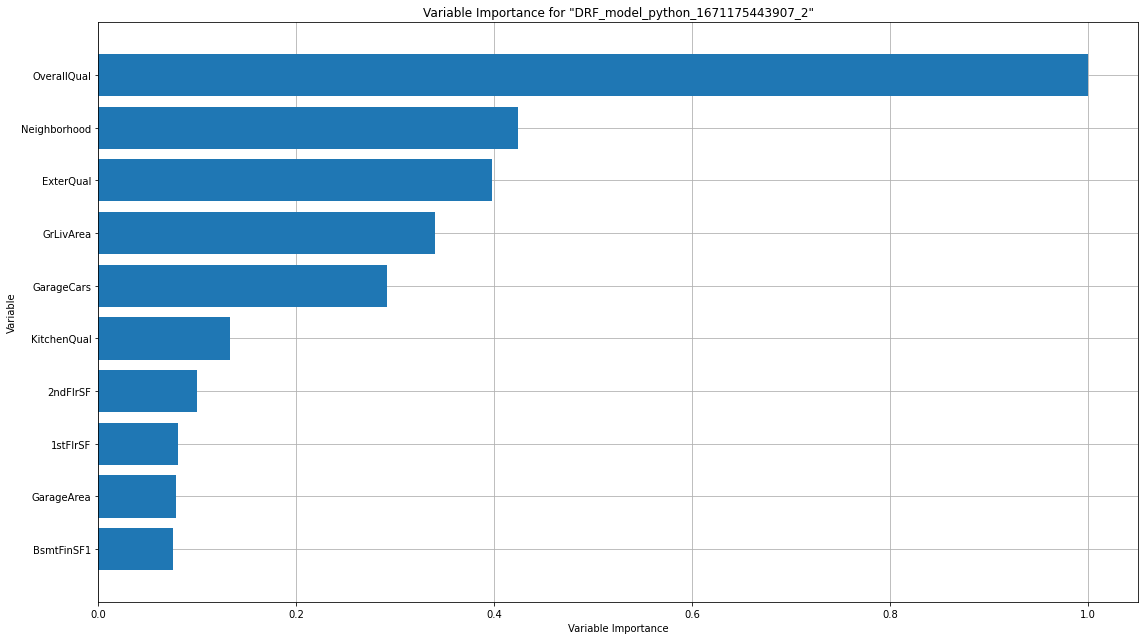

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

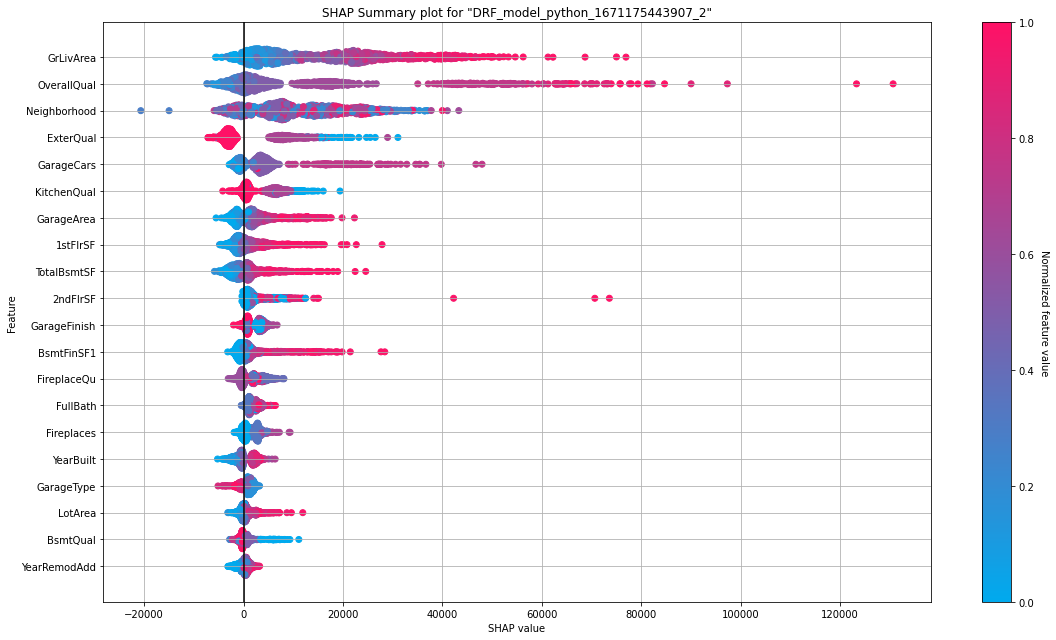

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

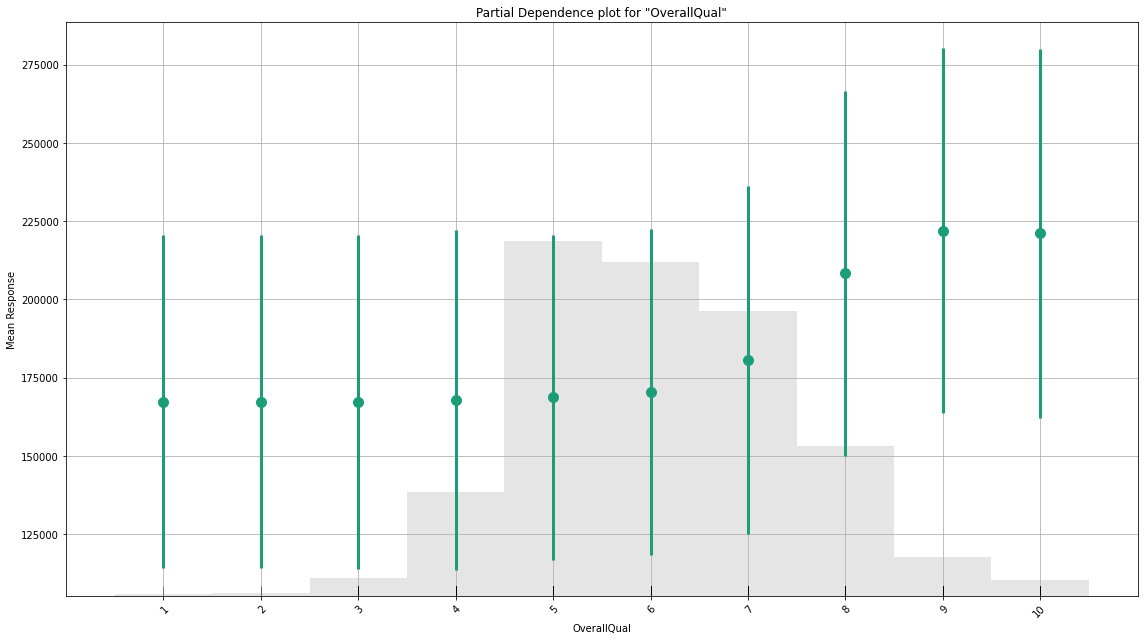

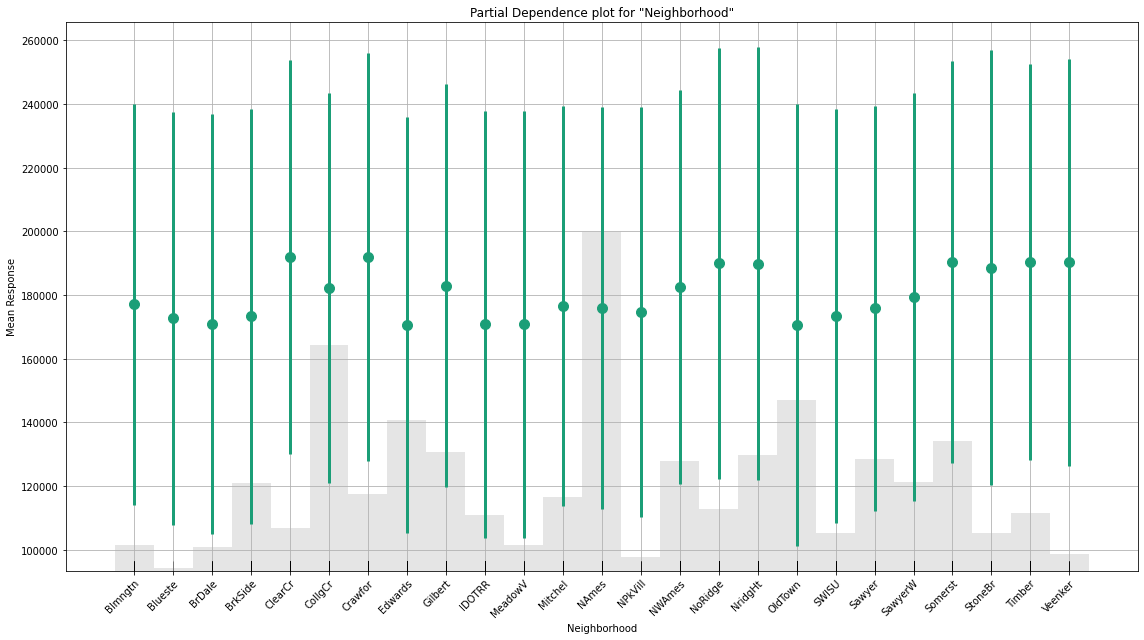

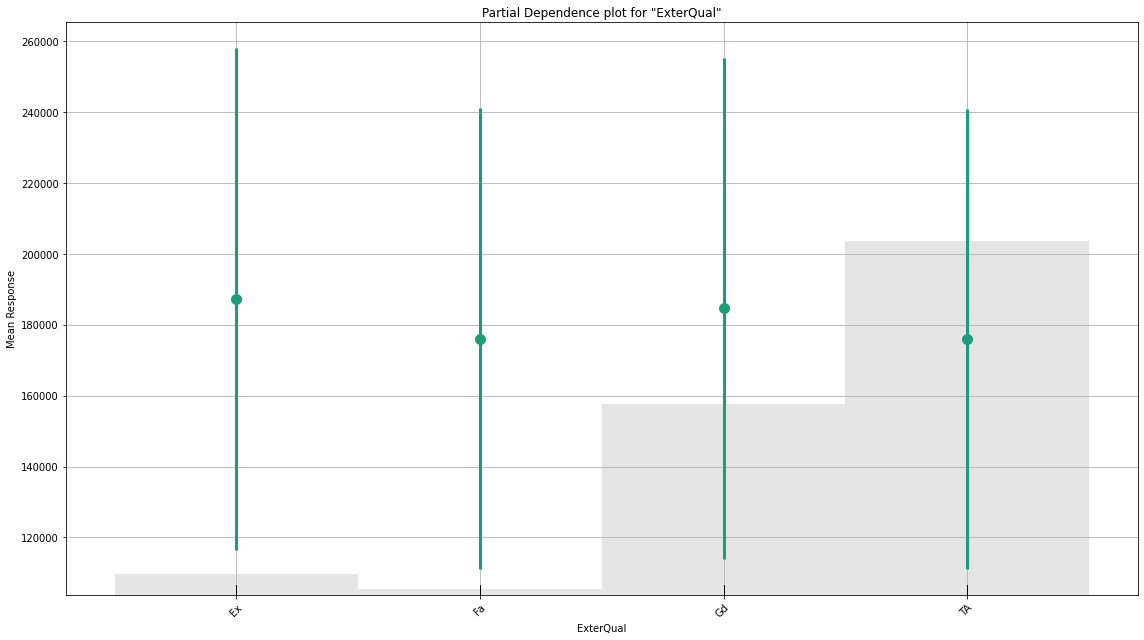

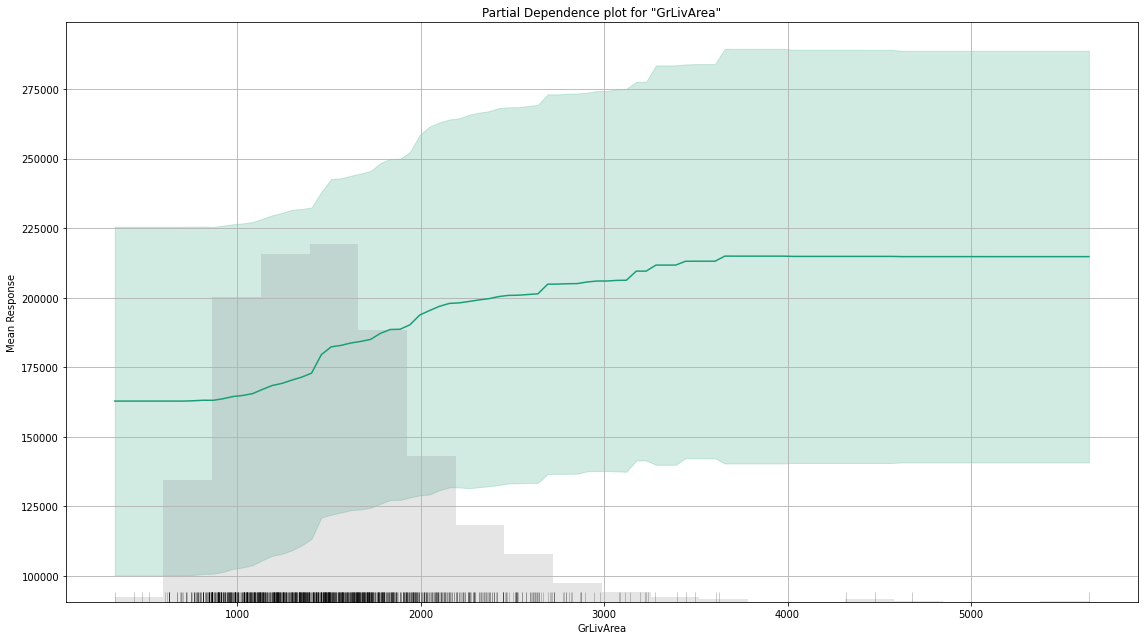

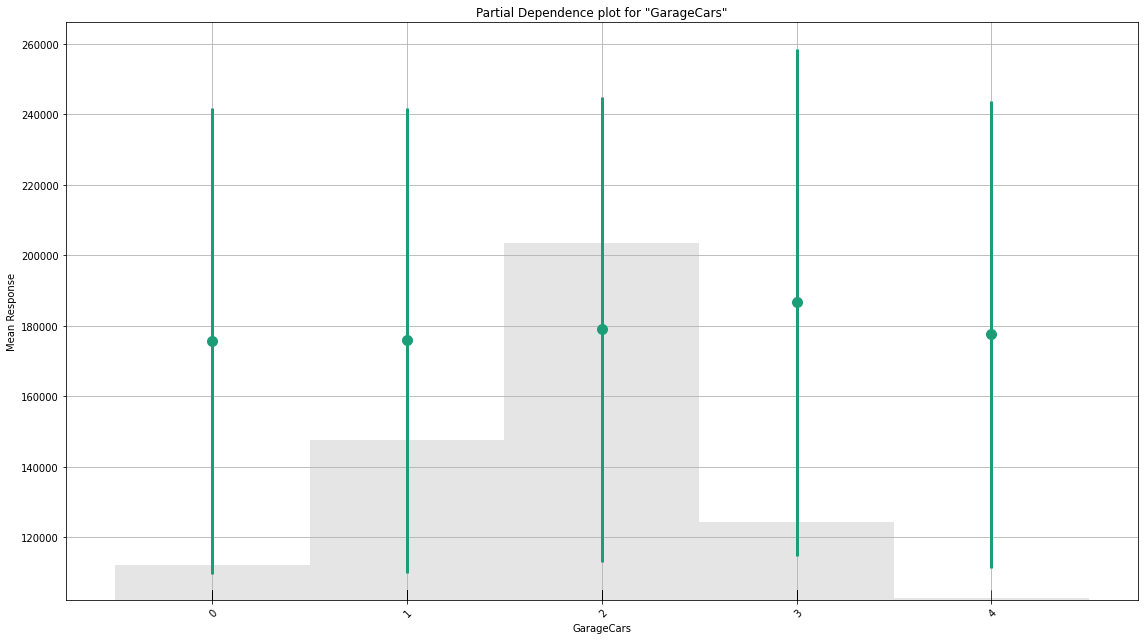

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

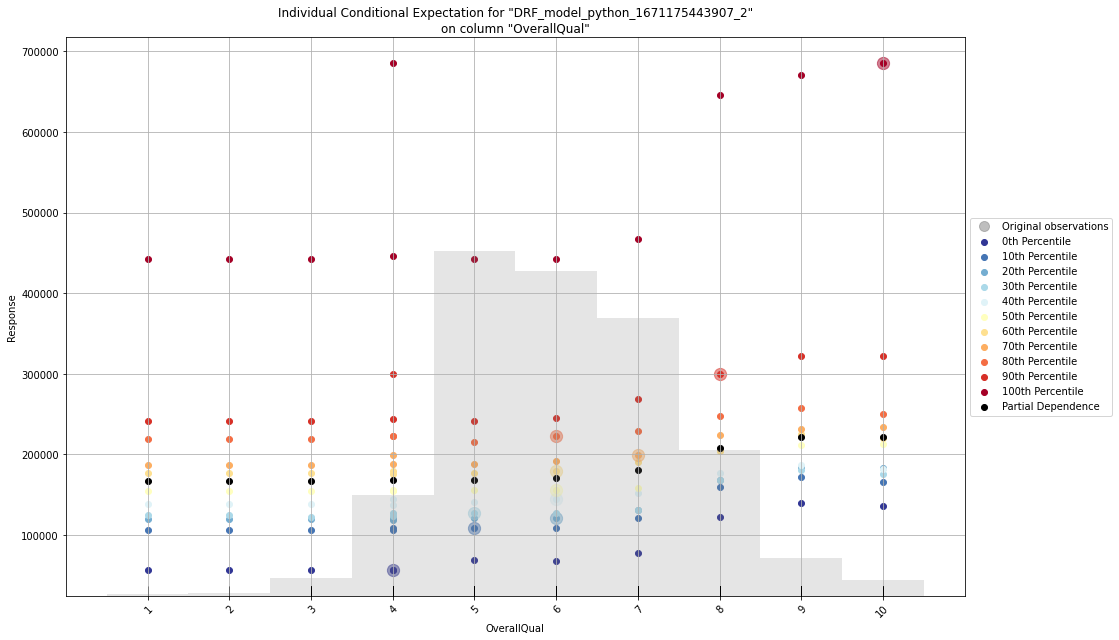

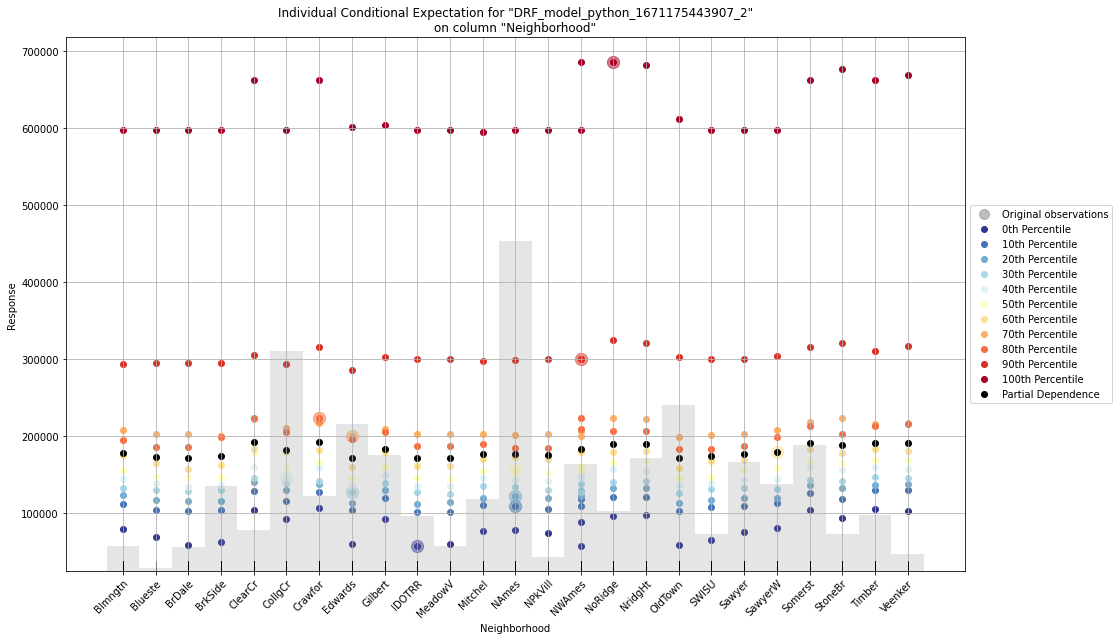

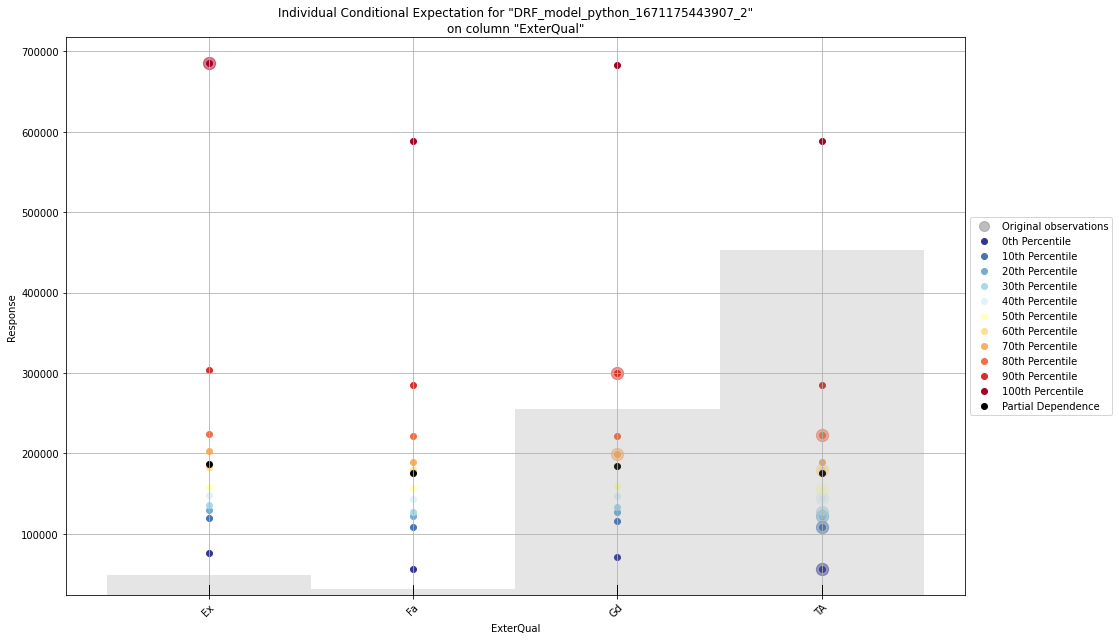

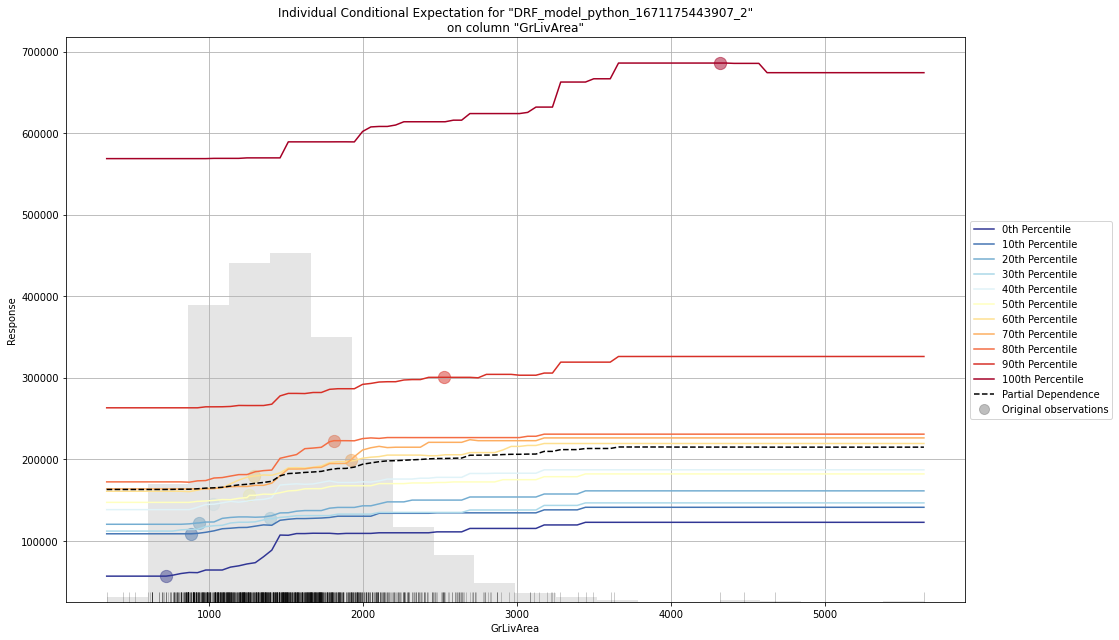

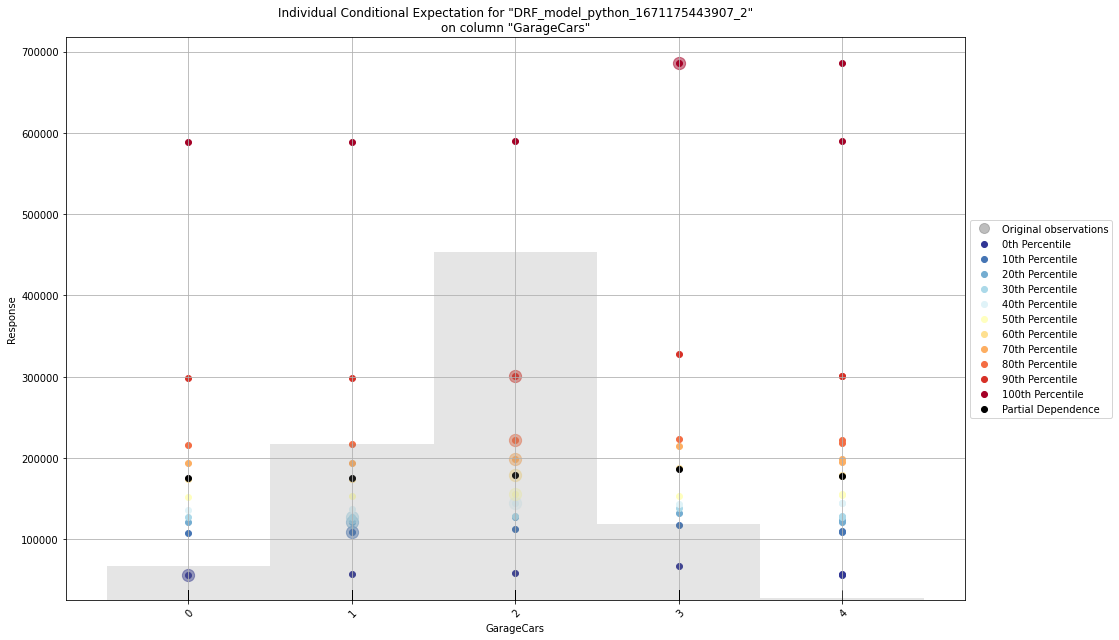

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

In [47]:
houses_drf.explain(houses)

In [48]:
from h2o.estimators.xgboost import H2OXGBoostEstimator

houses_xgb = H2OXGBoostEstimator(seed=1234)
houses_xgb.available()

True

In [49]:
houses_xgb.train(x = predictors, y = response, training_frame = H2Otrain, validation_frame= H2Ovalid)

xgboost Model Build progress: |

/usr/local/lib/python3.8/dist-packages/h2o/estimators/estimator_base.py:193: RuntimeWarning: Dropping bad and constant columns: [Utilities]
  warnings.warn(mesg["message"], RuntimeWarning)


██████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OXGBoostEstimator : XGBoost
Model Key: XGBoost_model_python_1671175443907_3


Model Summary: 
    number_of_trees
--  -----------------
    50

ModelMetricsRegression: xgboost
** Reported on train data. **

MSE: 15344374.940928025
RMSE: 3917.1896738513983
MAE: 2863.174515611747
RMSLE: 0.026141275416900173
Mean Residual Deviance: 15344374.940928025

ModelMetricsRegression: xgboost
** Reported on validation data. **

MSE: 846693129.7001423
RMSE: 29097.991849956627
MAE: 18335.750514346084
RMSLE: 0.14211773110464548
Mean Residual Deviance: 846693129.7001423

Scoring History: 
     timestamp            duration    number_of_trees    training_rmse       training_mae        training_deviance    validation_rmse     validation_mae      validation_deviance
---  -------------------  ----------  -----------------  ------------------  ------------------  -------------------  ------------------  ------------------  ---------------------
     2022-12-16 08:37:15  0.168 sec   0.0                197798.00945001293  180914.15818490245  39124052542.387405   196678.90953663655  180948.12633451956  38682593456.52046
     2022-12-16 08:37:15  0.341 sec   1.0                141830.08612556223  127618.53691886662  20115773330.384403   139460.73189976846  125871.01385954181  19449295742.019096
     2022-12-16 08:37:15  0.393 sec   2.0                102595.70259746334  90211.13276777195   10525878191.467148   101170.14689054356  88368.13449455072   10235398621.85416
     2022-12-16 08:37:15  0.442 sec   3.0                74887.30316513308   63976.05610223176   5608108175.346551    74776.26561987479   61846.925378113876  5591489900.054069
     2022-12-16 08:37:15  0.497 sec   4.0                55397.16101951841   45457.64302209234   3068845449.02245     56892.1817310828    44060.08884286032   3236720342.122551
     2022-12-16 08:37:15  0.548 sec   5.0                41705.19711234415   32612.87893938189   1739323466.1794786   45867.59860162383   32857.33756394573   2103836601.479684
     2022-12-16 08:37:15  0.600 sec   6.0                31949.841164009827  23908.37963515161   1020792350.4054569   38712.87894456846   25971.6314084742    1498686996.176812
     2022-12-16 08:37:15  0.637 sec   7.0                25191.43858058213   18205.854623886768  634608577.7592417    34897.211778736004  22114.054882117438  1217815389.9299507
     2022-12-16 08:37:15  0.682 sec   8.0                20405.923951526573  14632.976164917303  416401732.31548584   32484.785431294724  20299.607373220642  1055261284.5172579
     2022-12-16 08:37:15  0.743 sec   9.0                17118.81329868006   12340.057374496395  293053768.7550652    31257.56965794675   19490.074038033807  977035660.9213934
---  ---                  ---         ---                ---                 ---                 ---                  ---                 ---                 ---
     2022-12-16 08:37:18  3.234 sec   41.0               5057.844223458406   3718.1276041666665  25581788.188771565   29148.773576527914  18344.720918594307  849651001.0156919
     2022-12-16 08:37:18  3.330 sec   42.0               4757.412782183126   3518.8118870600083  22632976.380079392   29158.57217500383   18377.595265235766  850222331.2849076
     2022-12-16 08:37:18  3.479 sec   43.0               4619.621114754104   3410.8605114238762  21340899.243881952   29146.677023123273  18346.38290980872   849528781.4902622
     2022-12-16 08:37:18  3.589 sec   44.0               4465.976289154619   3271.6955046649705  19944944.21529126    29106.820916200286  18311.1860959742    847207023.8477545
     2022-12-16 08:37:18  3.678 sec   45.0               4369.117296117578   3194.3088786842663  19089185.947233774   29137.75427453016   18348.081753225088  849008724.1629007
     2022-12-16 08:37:18  3.774 sec   46.0               4260.267424270108   3103.629303832697   18149878.526297055   29126.780575560693  18353.931230538255  848369346.6968597
     2022-12-16 08:37:18  3.879 sec   47.0          

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

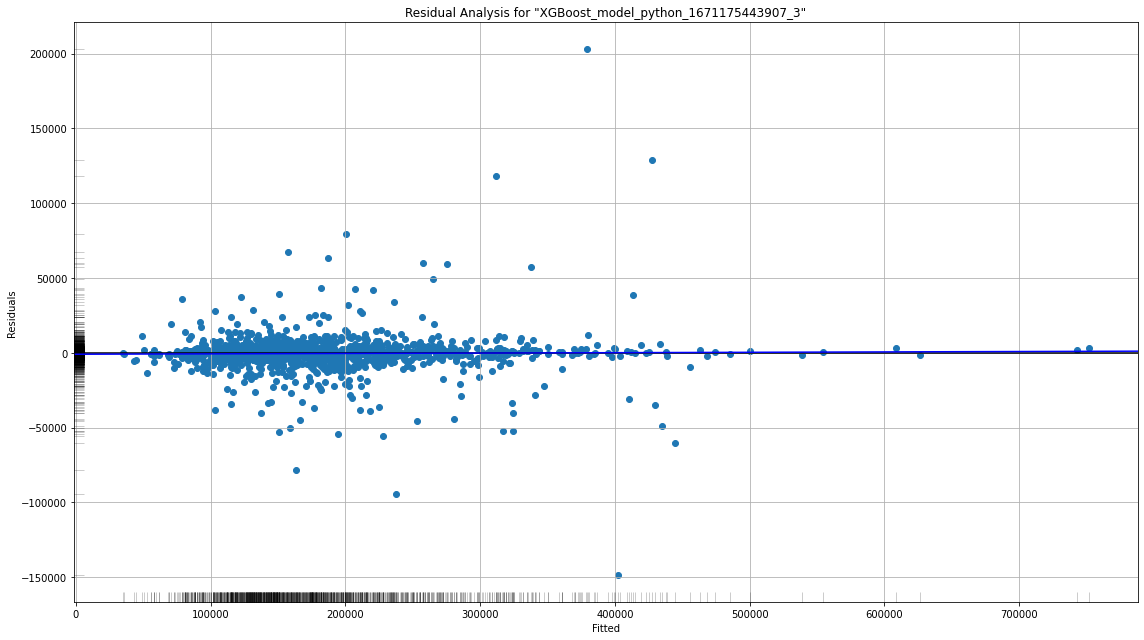

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

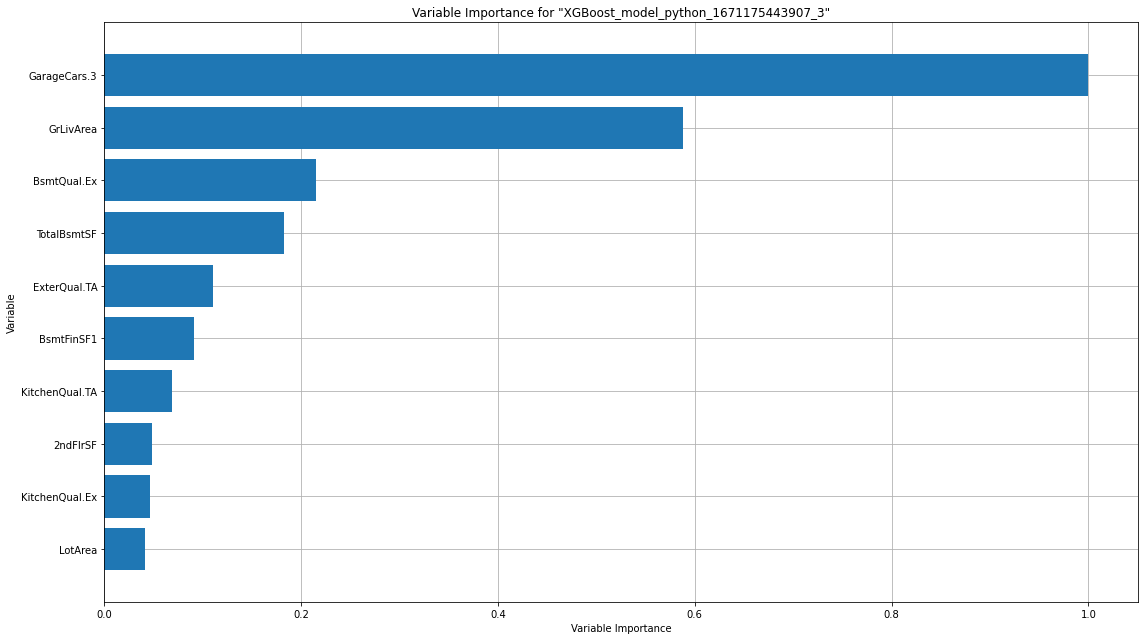

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

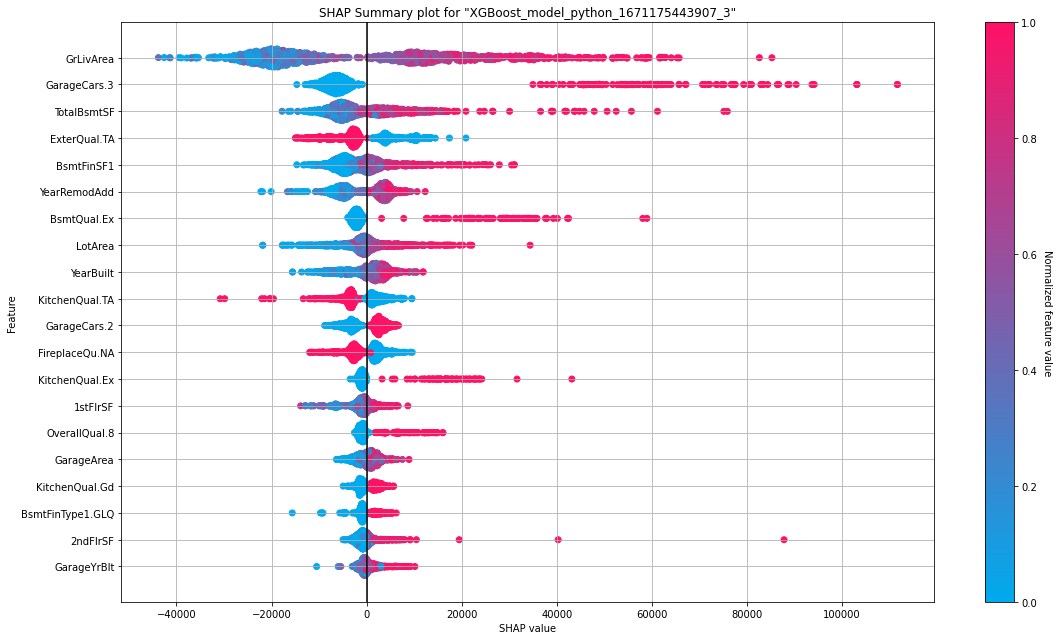

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

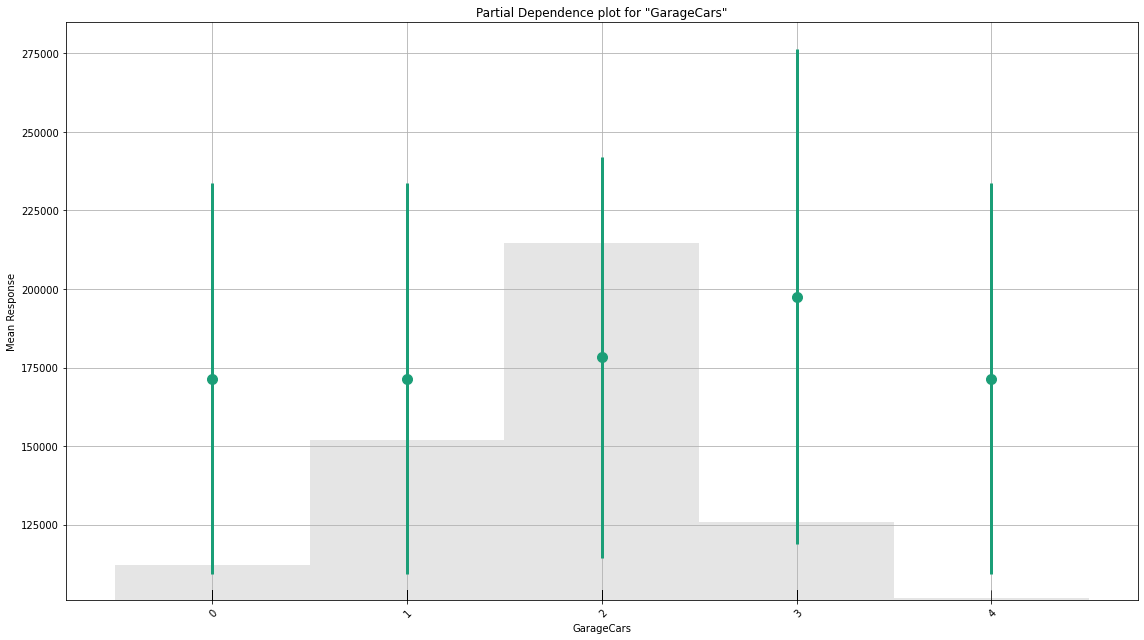

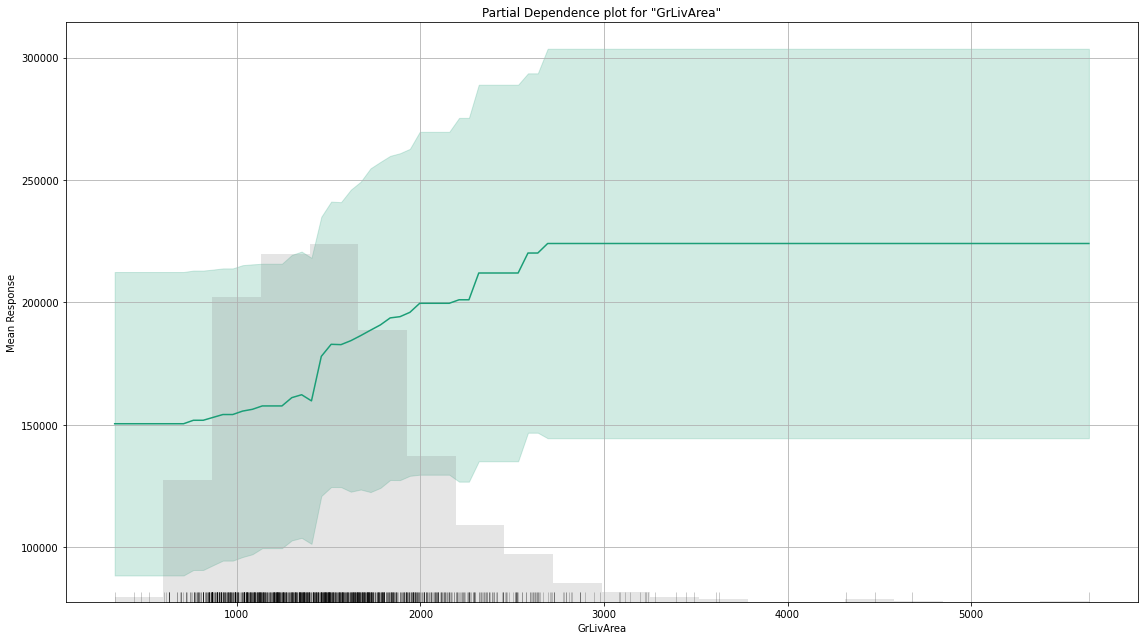

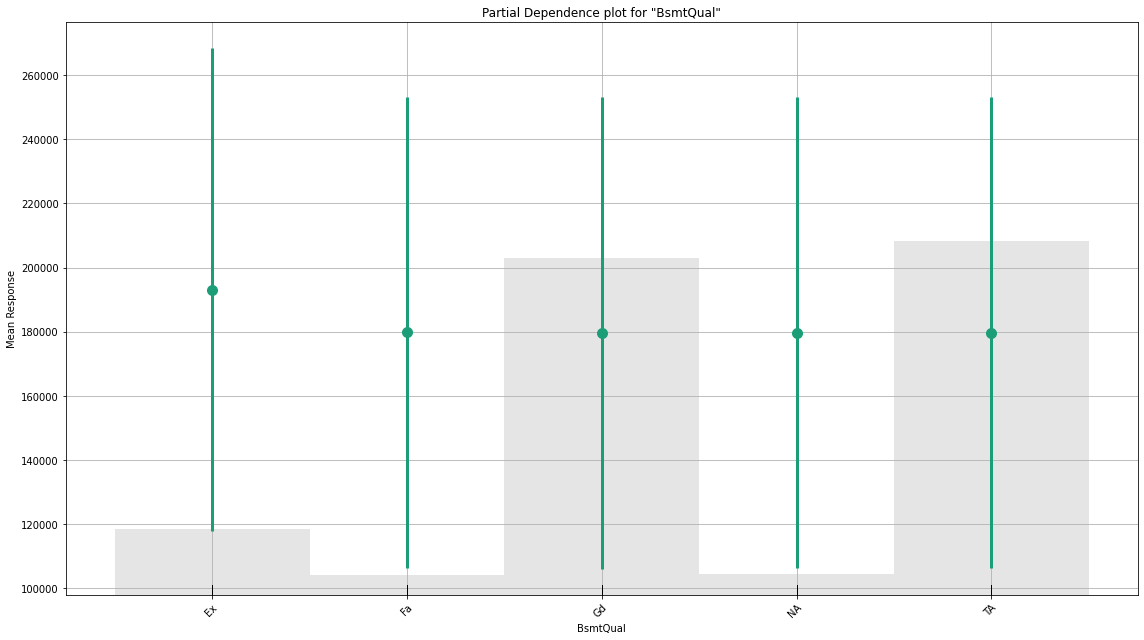

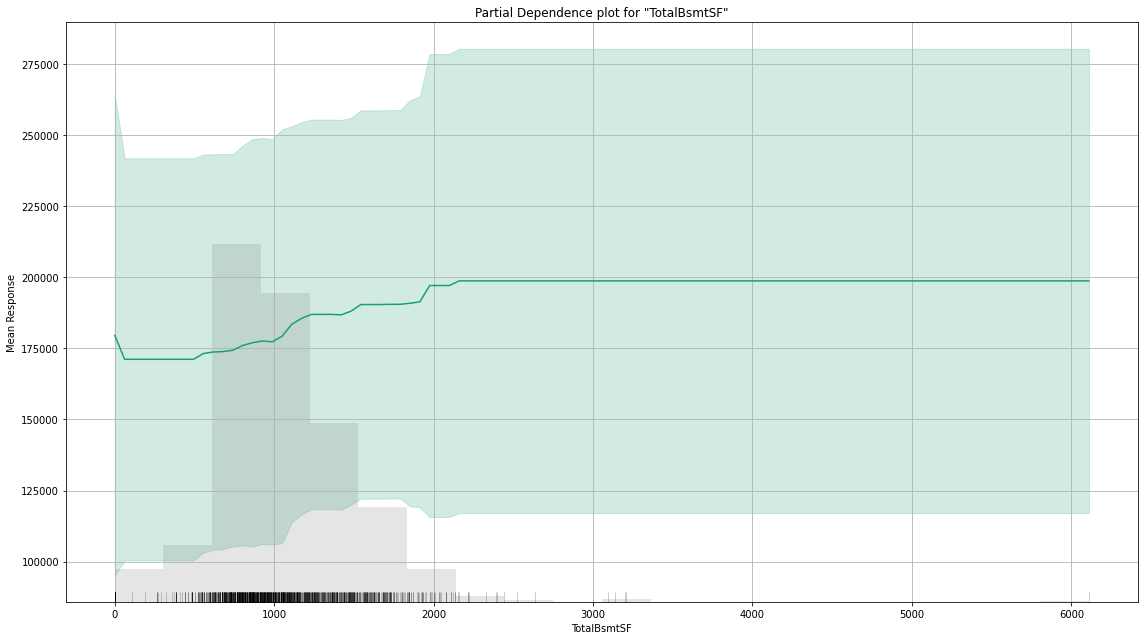

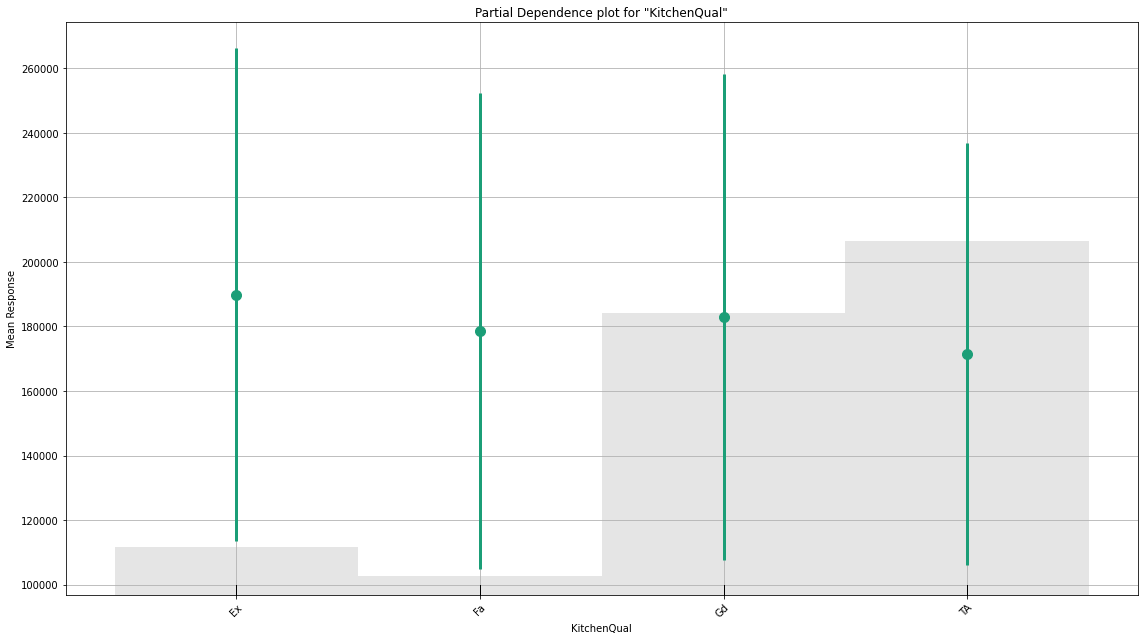

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

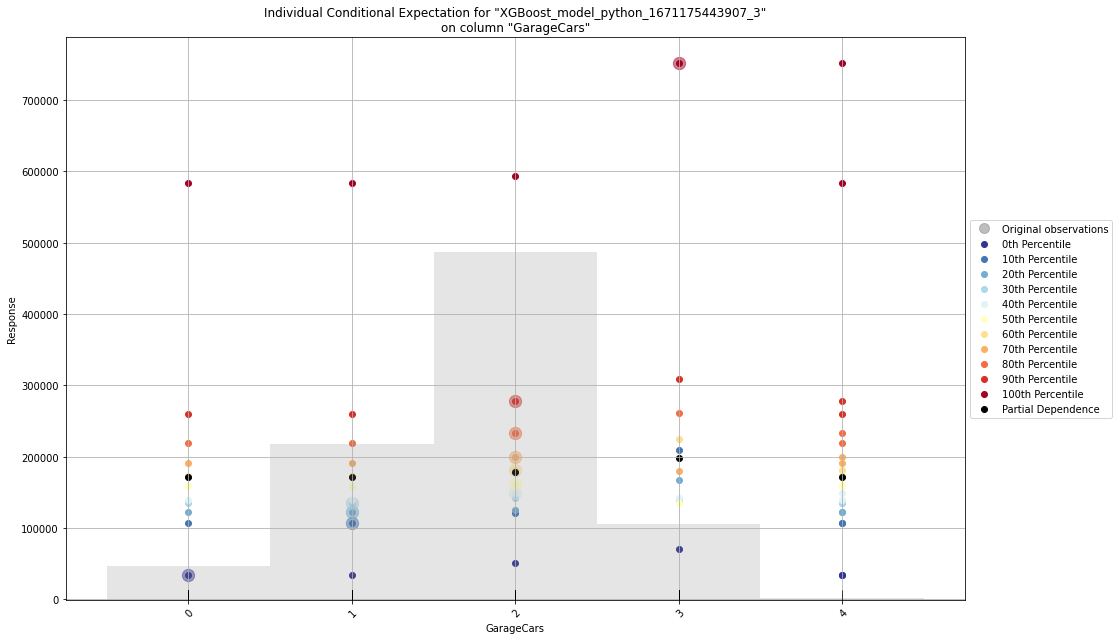

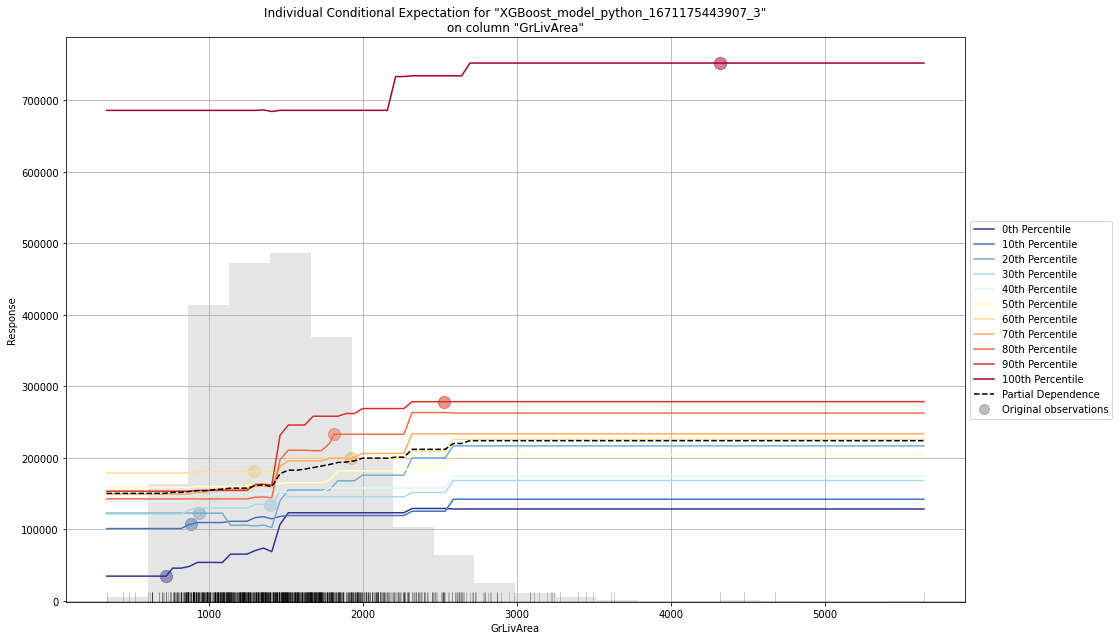

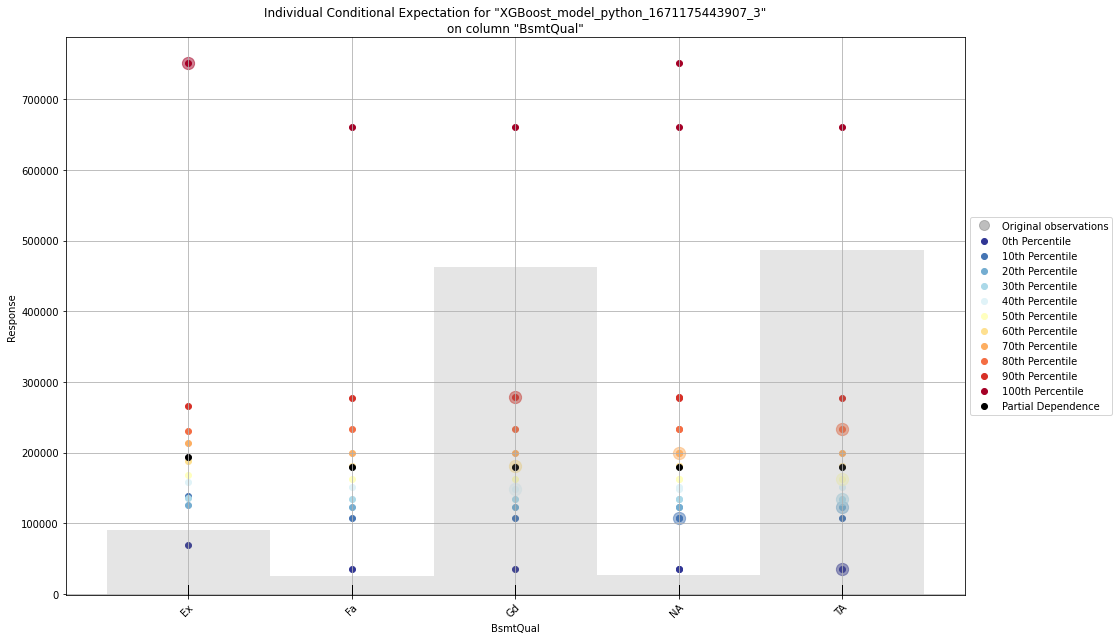

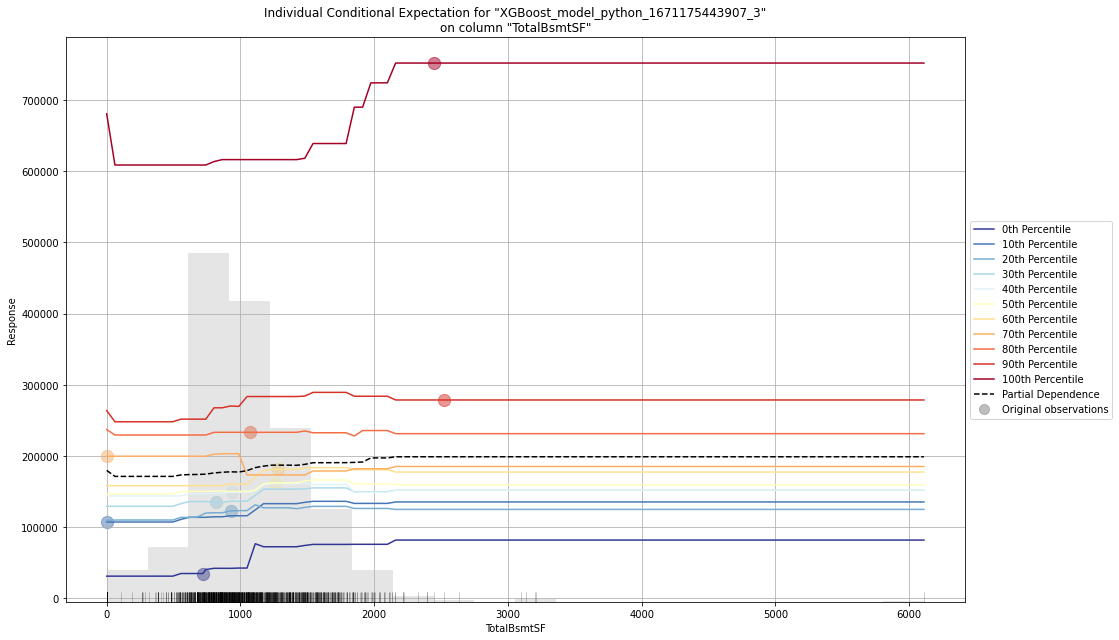

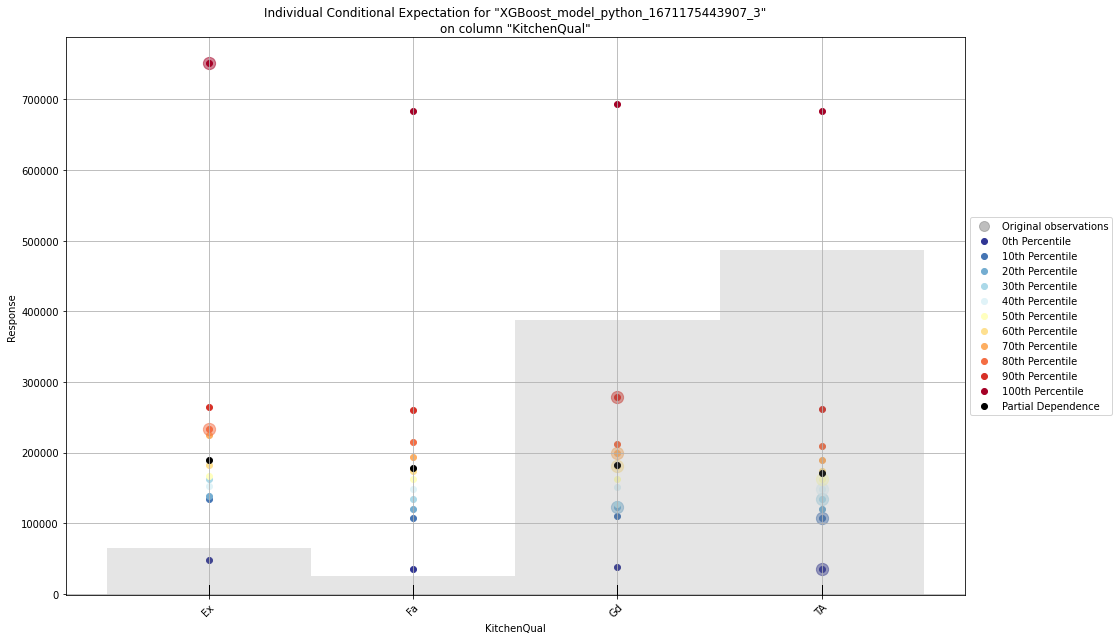

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

In [50]:
houses_xgb.explain(houses)

In [34]:
from matplotlib.pyplot import figure
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def xg_reg_function(data, target_column, feature_columns):
  X, y = data[feature_columns], data[target_column]
  data_dmatrix = xgb.DMatrix(data=X,label=y)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
  xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, 
                            learning_rate = 0.1, max_depth = 5, alpha = 10, n_estimators = 10)
  xg_reg.fit(X_train,y_train)
  preds = xg_reg.predict(X_test)
  rmse = np.sqrt(mean_squared_error(y_test, preds))
  print(f"{target_column} RMSE: {rmse}")
  xgb.plot_importance(xg_reg)
  figure(figsize=(10, 10))
  plt.show()